In [2]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
conn = sqlite3.connect('database.db')

In [4]:
ci = conn.cursor()

# Desain Database Data Warehouse
<img src="Desain Database.png">

In [5]:
ci.executescript('drop table if exists hari')
ci.executescript('drop table if exists channel')
ci.executescript('drop table if exists tipe')
ci.executescript('drop table if exists source')
ci.executescript('drop table if exists program')

ci.execute("CREATE TABLE IF NOT EXISTS 'hari' ('id' INT, 'nama_hari' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'channel' ('id' INT, 'nama_channel' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'tipe' ('id' INT, 'nama_tipe' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'source' ('id' INT, 'nama_source' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'program' ( 'id' INT, 'nama_program' VARCHAR(255) NULL, 'time_start' VARCHAR(255) NULL, 'durasi' VARCHAR(255) NULL, 'tanggal' DATE NULL, 'cost' VARCHAR(255) NULL, 'tvr' VARCHAR(255) NULL, 'audients' VARCHAR(255) NULL, 'share' VARCHAR(255) NULL, 'hari_id' INT NOT NULL, 'channel_id' INT NOT NULL, 'tipe_id' INT NOT NULL, 'source_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('hari_id') REFERENCES 'hari' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('channel_id') REFERENCES 'channel' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('tipe_id') REFERENCES 'tipe' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('source_id') REFERENCES 'source' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [6]:
df = pd.read_csv("Dataset Acara Trans TV Januari - Mei.csv")
df

,Tanggal,Hari,Nama,Pukul,Durasi,Cost,TVR,Audients,Share,Market,Tipe,Source,Channel
0,09/01/2021,Sabtu,Revolutionary Love,1:30,"1,5 jam",Rp. 60.000.000,2.5,20 Jt Orang,10.4,Indonesia,Drama Korea,Indonesia,Trans TV
1,09/01/2021,Sabtu,CNN Connected,3:00,2 jam,Rp. 60.000.000,2.5,20 jt Orang,9.7,Indonesia,Berita,Indonesia,Trans TV
2,09/01/2021,Sabtu,Islam Itu Indah,5:00,"1,5 jam",Rp. 50.000.000,5.5,100 Jt Orang,15.2,Indonesia,Religi,Indonesia,Trans TV
3,09/01/2021,Sabtu,Insert Pagi,6:30,1 jam,Rp. 50.000.000,7.5,150 Jt Orang,16.4,Indonesia,Hiburan,Indonesia,Trans TV
4,09/01/2021,Sabtu,Celebrity On Vacation,7:30,"0,5 jam",Rp. 150.000.000,7.5,125 Jt Orang,19.1,Indonesia,Berita,Indonesia,Trans TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,09/05/2021,Minggu,Hangout with Andre,18:00,1 jam,Rp. 65.000.000,5.1,100 Jt Orang,11.2,Indonesia,Hiburan,Indonesia,Trans TV
106,09/05/2021,Minggu,Deddy’s Corner,19:00,1 jam,Rp. 150.000.000,6.7,100 Jt Orang,15.2,Indonesia,Hiburan,Indonesia,Trans TV
107,09/05/2021,Minggu,CNN Prime News,20:00,1 jam,Rp. 55.000.000,7.7,100 Jt Orang,14.7,Indonesia,Berita,Indonesia,Trans TV
108,09/05/2021,Minggu,Bioskop Trans TV ( Shark Night ),21:00,2 jam,Rp. 200.000.000,7.1,130 Jt Orang,17.4,Indonesia,Hiburan,Indonesia,Trans TV


In [7]:
hari = []
channel = []
tipe = []
source = []

for i,j in df.iterrows():
    if j[1] not in hari:
        hari.append(j[1])
    h = -1
    for index, value in enumerate(hari):
        if value == j[1]: 
            h = index+1
            break
        
    if [j[12]] not in channel:
        channel.append([j[12]])
    c = -1
    for index, value in enumerate(channel):
        if value == j[12]:
            c = index+1
            break
        
    if [j[10]] not in tipe:
        tipe.append([j[10]])
    t = -1
    for index, value in enumerate(tipe):
        if value == j[10]:
            t = index+1
            break
    
    if [j[11]] not in source:
        source.append([j[11]])
    s = -1
    for index, value in enumerate(source):
        if value == j[11]:
            s = index+1
            break


program = []
for i,j in df.iterrows():   
    h = -1
    
    for index, value in enumerate(hari):
        if value == j[1]:
            h = index+1
            break
    
    cha = -1
    for index, value in enumerate(channel):
        if value[0] == j[12]:
            cha = index+1
            break
        
    tip = -1
    for index, value in enumerate(tipe):
        if value[0] == j[10]:
            tip = index+1
            break
    
    sou = -1
    for index, value in enumerate(source):
        if value[0] == j[11]:
            sou = index+1
            break
    
    program.append([j[2], j[3], j[4], j[0], j[5].replace("Rp. ", "").replace(".", ""), j[6], j[7].replace(" Jt ", "000").replace("Orang", "000").replace(" jt ", "000"), j[8], h, cha, tip, sou])

In [8]:
ci.execute("DELETE FROM CHANNEL")
for index, i in enumerate(channel): 
    ci.execute("INSERT INTO CHANNEL VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM TIPE")
for index, i in enumerate(tipe): 
    ci.execute("INSERT INTO TIPE VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM SOURCE")
for index, i in enumerate(source): 
    ci.execute("INSERT INTO SOURCE VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM HARI")
for index, i in enumerate(hari): 
    ci.execute("INSERT INTO HARI VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")

ci.execute("DELETE FROM PROGRAM")
for index, i in enumerate(program):
    hari_id = i[8]
    channel_id = i[9]
    tipe_id = i[10]
    source_id = i[11]
    ci.execute("INSERT INTO PROGRAM VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','" + str(i[3]) + "','" + str(i[4]) + "','" + str(i[5]) + "','" + str(i[6]) + "','" + str(i[7]) + "'," + str(hari_id) + "," + str(channel_id) + "," + str(tipe_id) + "," + str(source_id) + ")")

    
conn.commit()

In [9]:
ci.execute('''SELECT * FROM CHANNEL''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("======================== CHANNEL ================================")
print(KOTA)
print("=================================================================")

ci.execute('''SELECT * FROM TIPE''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("======================== TIPE ================================")
print(KOTA)
print("==============================================================")


ci.execute('''SELECT * FROM SOURCE''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("======================== SOURCE ================================")
print(KOTA)
print("================================================================")

ci.execute('''SELECT * FROM HARI''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("======================== HARI ================================")
print(KOTA)
print("==============================================================")

ci.execute('''SELECT * FROM PROGRAM''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("======================== PROGRAM ================================")
print(KOTA)
print("=================================================================")

======================== CHANNEL ================================
[(1, 'Trans TV')]
======================== TIPE ================================
[(1, 'Drama Korea'), (2, 'Berita'), (3, 'Religi'), (4, 'Hiburan'), (5, 'Drama Hiburan')]
======================== SOURCE ================================
[(1, 'Indonesia')]
======================== HARI ================================
[(1, 'S'), (2, 'S'), (3, 'J'), (4, 'M')]
======================== PROGRAM ================================
[(1, 'Revolutionary Love', '1:30', '1,5 jam', '09/01/2021', '60000000', '2.5', '20000000', '10.4', 1, 1, 1, 1), (2, 'CNN Connected', '3:00', '2 jam', '09/01/2021', '60000000', '2.5', '20000000', '9.7', 1, 1, 2, 1), (3, 'Islam Itu Indah', '5:00', '1,5 jam', '09/01/2021', '50000000', '5.5', '100000000', '15.2', 1, 1, 3, 1), (4, 'Insert Pagi', '6:30', '1 jam', '09/01/2021', '50000000', '7.5', '150000000', '16.4', 1, 1, 4, 1), (5, 'Celebrity On Vacation', '7:30', '0,5 jam', '09/01/2021', '150000000', '7.5', '

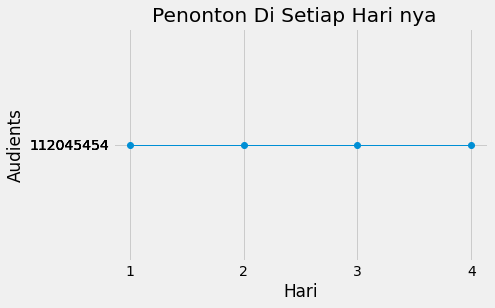

,Hari,Jumlah
1,1.0,1.120455e+08
2,2.0,1.120455e+08
3,3.0,1.120455e+08
4,4.0,1.120455e+08


In [10]:
ci.execute('''select * from(select hari_id, avg(audients) as jumlah_penonton from program group by hari_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Hari')
plt.ylabel('Audients')
plt.title("Penonton Di Setiap Hari nya  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Hari', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df

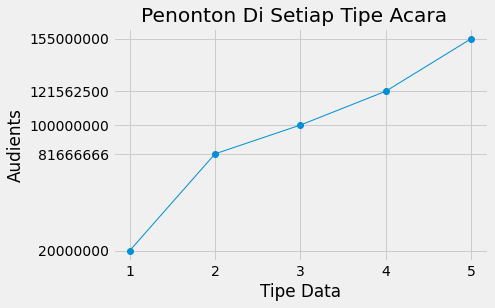

,Hari,Jumlah
1,1.0,2.000000e+07
2,2.0,8.166667e+07
3,3.0,1.000000e+08
4,4.0,1.215625e+08
5,5.0,1.550000e+08


In [11]:
ci.execute('''select * from(select tipe_id, avg(audients) as jumlah_penonton from program group by tipe_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Tipe Data')
plt.ylabel('Audients')
plt.title("Penonton Di Setiap Tipe Acara  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Hari', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df
